In [ ]:
!pip install d2l==1.0.3

['Collecting d2l==1.0.3',
 '  Downloading d2l-1.0.3-py3-none-any.whl (111 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/111.7 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b41.0/111.7 kB\x1b \x1b1.1 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━\x1b \x1b102.4/111.7 kB\x1b \x1b1.6 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b111.7/111.7 kB\x1b \x1b1.4 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hCollecting jupyter==1.0.0 (from d2l==1.0.3)',
 '  Downloading jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)',
 'Collecting numpy==1.23.5 (from d2l==1.0.3)',
 '  Downloading numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/17.1 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K    

In [ ]:
!pip install torchvision==0.15.1

  Obtaining dependency information for torchvision==0.15.1 from https://files.pythonhosted.org/packages/0e/2f/bfd590bf3bfd4cb326cdd6bd81600f77e5eaddad718f1dc87e2ca9312582/torchvision-0.15.1-cp38-cp38-win_amd64.whl.metadata
  Using cached torchvision-0.15.1-cp38-cp38-win_amd64.whl.metadata (11 kB)
Using cached torchvision-0.15.1-cp38-cp38-win_amd64.whl (1.2 MB)


In [ ]:
import torch
from d2l import torch as d2l
import math

In [121]:
def train_2d(trainer, steps=20, f_grad=None):
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used in Momentum, adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results, title, filepath=None):
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize(figsize=(10, 7))
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                          torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.title(title)
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')
    if filepath:
      d2l.plt.savefig(filepath)

In [ ]:

def f_2d(x1, x2):
    return 0.05 * x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.1 * x1, x2 - eta * 4 * x2, 0, 0)

epoch 20, x1: -0.003990, x2: -1345499989865120137216.000000


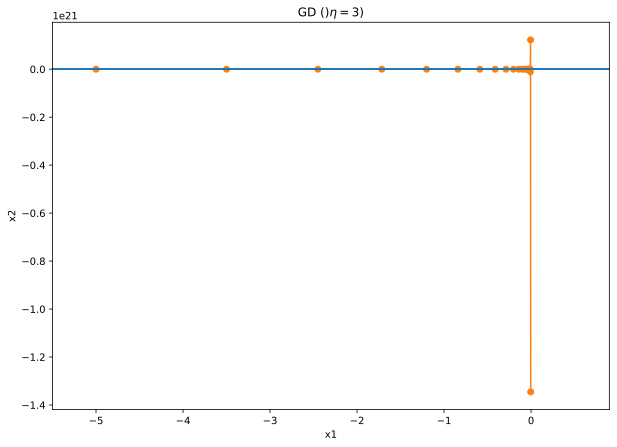

In [117]:
eta = 3
show_trace_2d(f_2d, train_2d(gd_2d), 'GD ($)\eta=3$)')

epoch 20, x1: -2.210012, x2: -0.000073


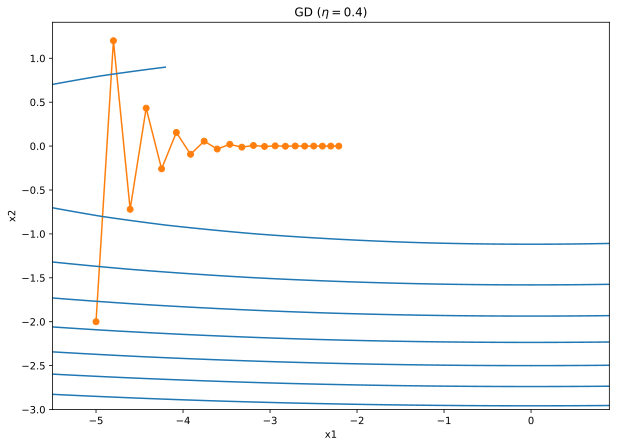

In [118]:
eta = 0.4
show_trace_2d(f_2d, train_2d(gd_2d), 'GD ($\eta=0.4$)')

epoch 20, x1: -1.792430, x2: -2.000000


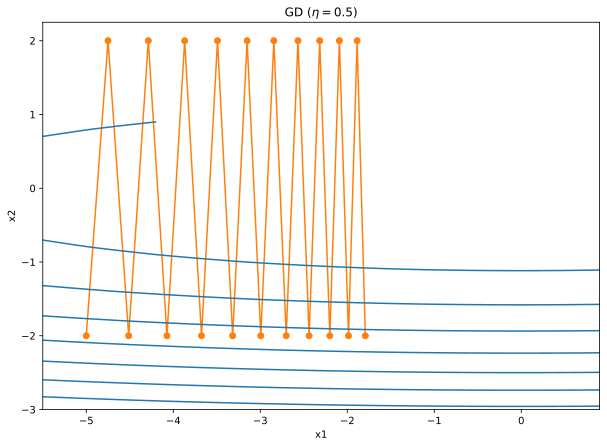

In [119]:
eta = .5
show_trace_2d(f_2d, train_2d(gd_2d), 'GD ($\eta=0.5$)')

epoch 20, x1: 0.007188, x2: 0.002553


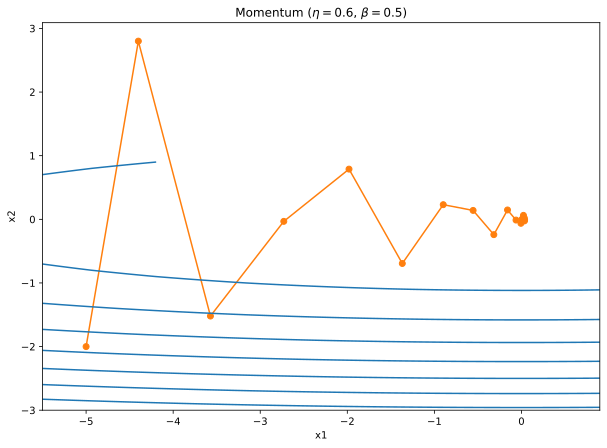

In [ ]:
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5
show_trace_2d(f_2d, train_2d(momentum_2d), r'Momentum ($\eta=0.6$, $\beta=0.5$)')

epoch 20, x1: -0.010601, x2: 0.000000


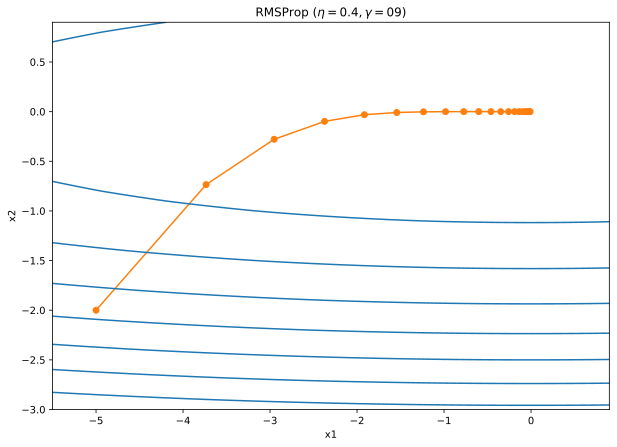

In [ ]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.1 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.05 * x1 ** 2 + 2 * x2 ** 2# 0.1 * x1 ** 2 + 2 * x2 ** 2

eta, gamma = 0.4, 0.9
show_trace_2d(f_2d, train_2d(rmsprop_2d, steps=20), title=r'RMSProp ($\eta=0.4, \gamma=09$)', save_path='RMSProp')

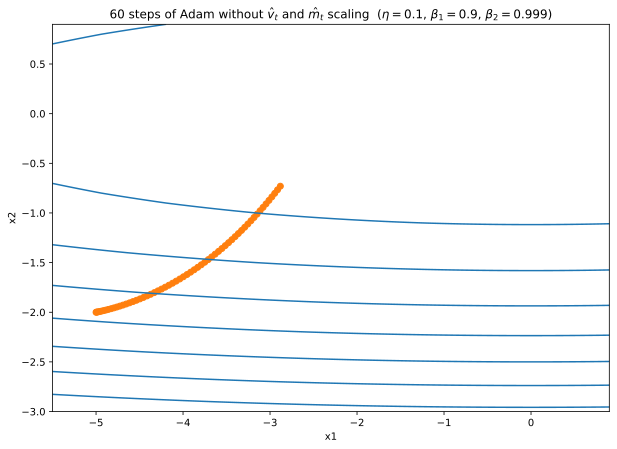

In [184]:
import torch
import matplotlib.pyplot as plt

def f_2d(x1, x2):
    return 0.05 * x1 ** 2 + 2 * x2 ** 2

def adam_2d(x1, x2, s1, s2):
    g1, g2 = 0.1 * x1, 4 * x2  # Gradients of the function
    s1 = beta1 * s1 + (1 - beta1) * g1
    s2 = beta2 * s2 + (1 - beta2) * g2
    return (x1 - lr * s1, x2 - lr * s2, s1, s2)



lr, beta1, beta2 = 0.1, 0.9, 0.999

x1, x2, s1, s2 = -5, -2, 0, 0
results = [(x1, x2)]

for t in range(60):
    x1, x2, s1, s2 = adam_2d(x1, x2, s1, s2)
    results.append((x1, x2))

show_trace_2d(f_2d, results, r'60 steps of Adam without $\hat{v}_t$ and $\hat{m}_t$ scaling  ($\eta=0.1$, $\beta_1=0.9$, $\beta_2=0.999$)', 'adam_withou_scaling')


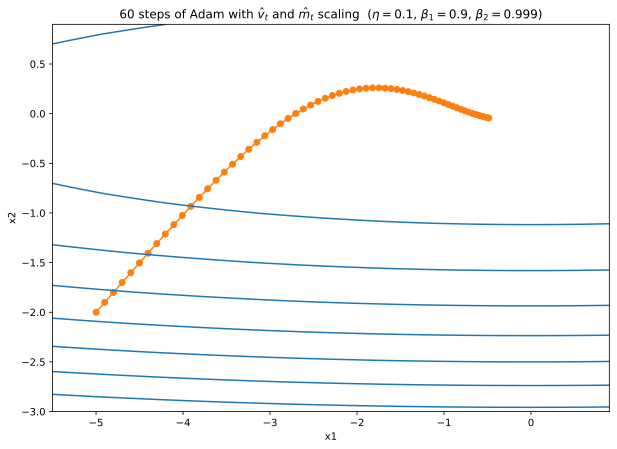

In [185]:
params = torch.tensor([-5.0, -2.0], requires_grad=True)

optimizer = torch.optim.Adam([params], lr=0.1)

results = [params.detach().clone()]

for t in range(60):
    optimizer.zero_grad()
    f_val = f_2d(params[0], params[1])
    f_val.backward()
    optimizer.step()
    results.append(params.detach().clone())

# Use the custom plotting function
show_trace_2d(f_2d, results, r'60 steps of Adam with $\hat{v}_t$ and $\hat{m}_t$ scaling  ($\eta=0.1$, $\beta_1=0.9$, $\beta_2=0.999$)', 'adam_withou_scaling')
